In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Train dataset
df_train=pd.read_csv("train_cleaned.csv")

#Weather dataset
df_weather=pd.read_csv("weather_cleaned.csv")

#Merge dataset
df_train_weather = pd.merge(df_weather, df_train, on=['year', 'month', 'week', 'day', 'day_of_week'])

In [2]:
#Take a look at the correlation of numeric variables to wnvpresent
#Sort in descending order
#we shall take a further look at weather and date variables with correlation > +- 10^-4 (all except for station)

df_train_weather.corr()['wnvpresent'].sort_values(ascending = False)

wnvpresent         1.000000e+00
nummosquitos       1.968196e-01
sunrise            1.052275e-01
week               1.041714e-01
month              1.001433e-01
dewpoint           8.563218e-02
wetbulb            8.033394e-02
tmin               7.300490e-02
tavg               6.392866e-02
cool               5.766827e-02
year               5.086477e-02
tmax               4.814037e-02
latitude           2.869683e-02
day_of_week        1.496779e-02
stnpressure        8.680857e-03
day                8.244972e-03
addressaccuracy    8.063718e-03
sealevel           6.467982e-03
block              4.877472e-03
resultdir          1.699088e-04
station            1.292215e-16
preciptotal       -2.466604e-04
avgspeed          -2.902903e-02
resultspeed       -4.556707e-02
heat              -5.443937e-02
longitude         -6.034514e-02
sunset            -6.845146e-02
Name: wnvpresent, dtype: float64

We generate the heat map and pairplot of the variables which have correlation correation > +- 10^-4 with wnvpresent. To note that there are a number of variables which are strongly correlated (> 0.5 or <0.5) with each other. To decide which variables should be selected for our model after we conduct EDA.

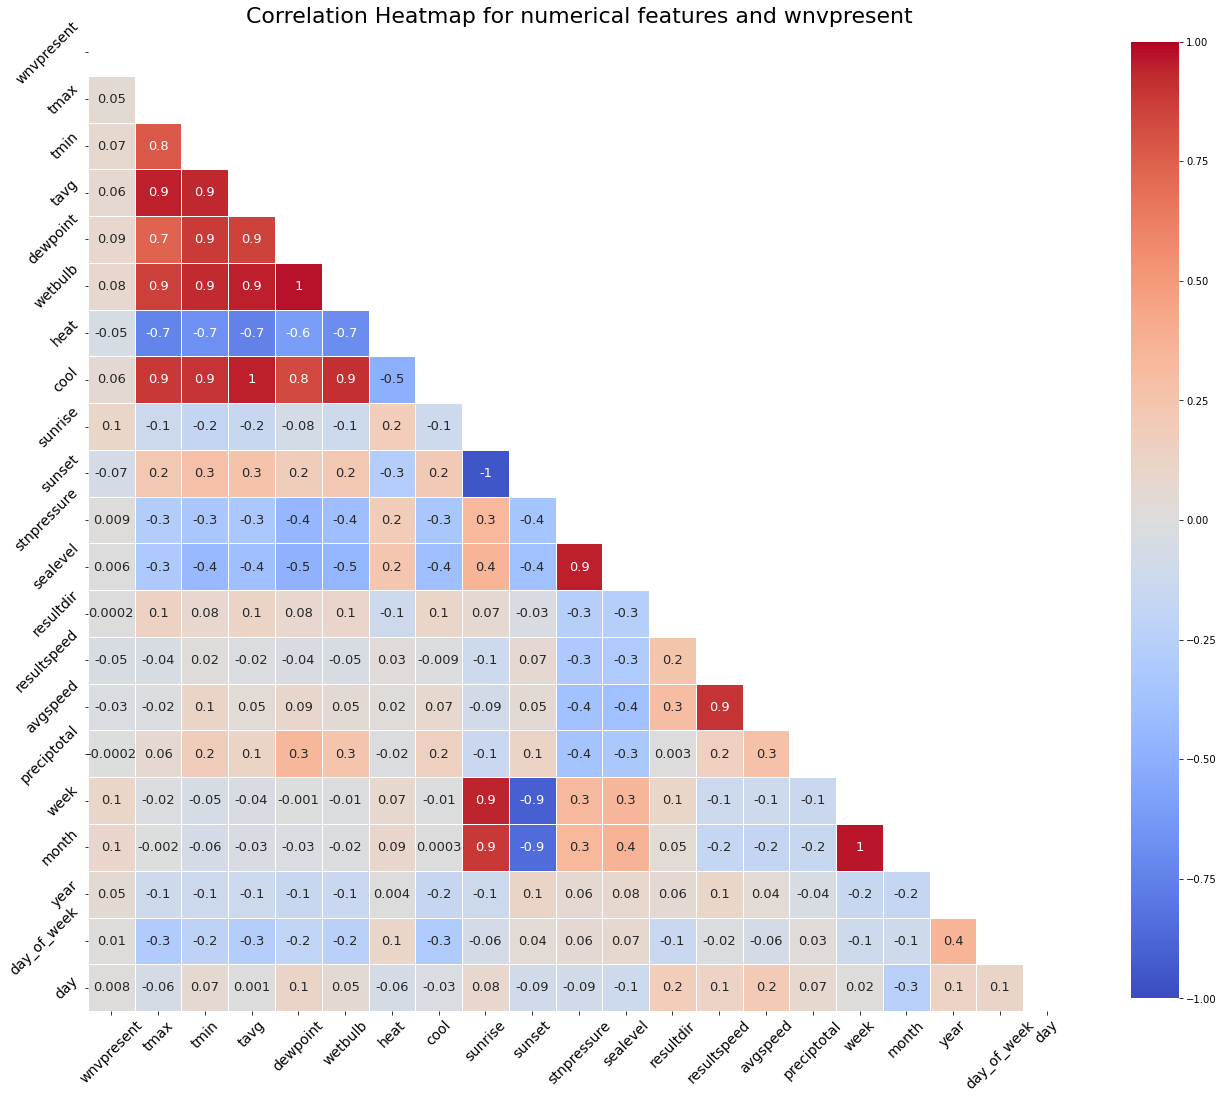

In [3]:
#plot heat map

df_heatmap = df_train_weather.filter(['wnvpresent', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'stnpressure', 'sealevel', 'resultdir', 'resultspeed', 'avgspeed', 'preciptotal', 'week', 'month', 'year', 'day_of_week', 'day'])

fix, ax = plt.subplots(figsize=(22,22))

mask = np.zeros_like(df_heatmap.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(df_heatmap.corr(), mask=mask, ax=ax, cmap='coolwarm',vmin=-1, vmax=1,
square=True, linewidth=1,annot=True,annot_kws={'size':'13'},
cbar_kws={"shrink": 0.8}, fmt='.1g',center=0)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

plt.xticks(rotation=45)
plt.yticks(rotation=45)

ax.set_title('Correlation Heatmap for numerical features and wnvpresent', fontsize=22);

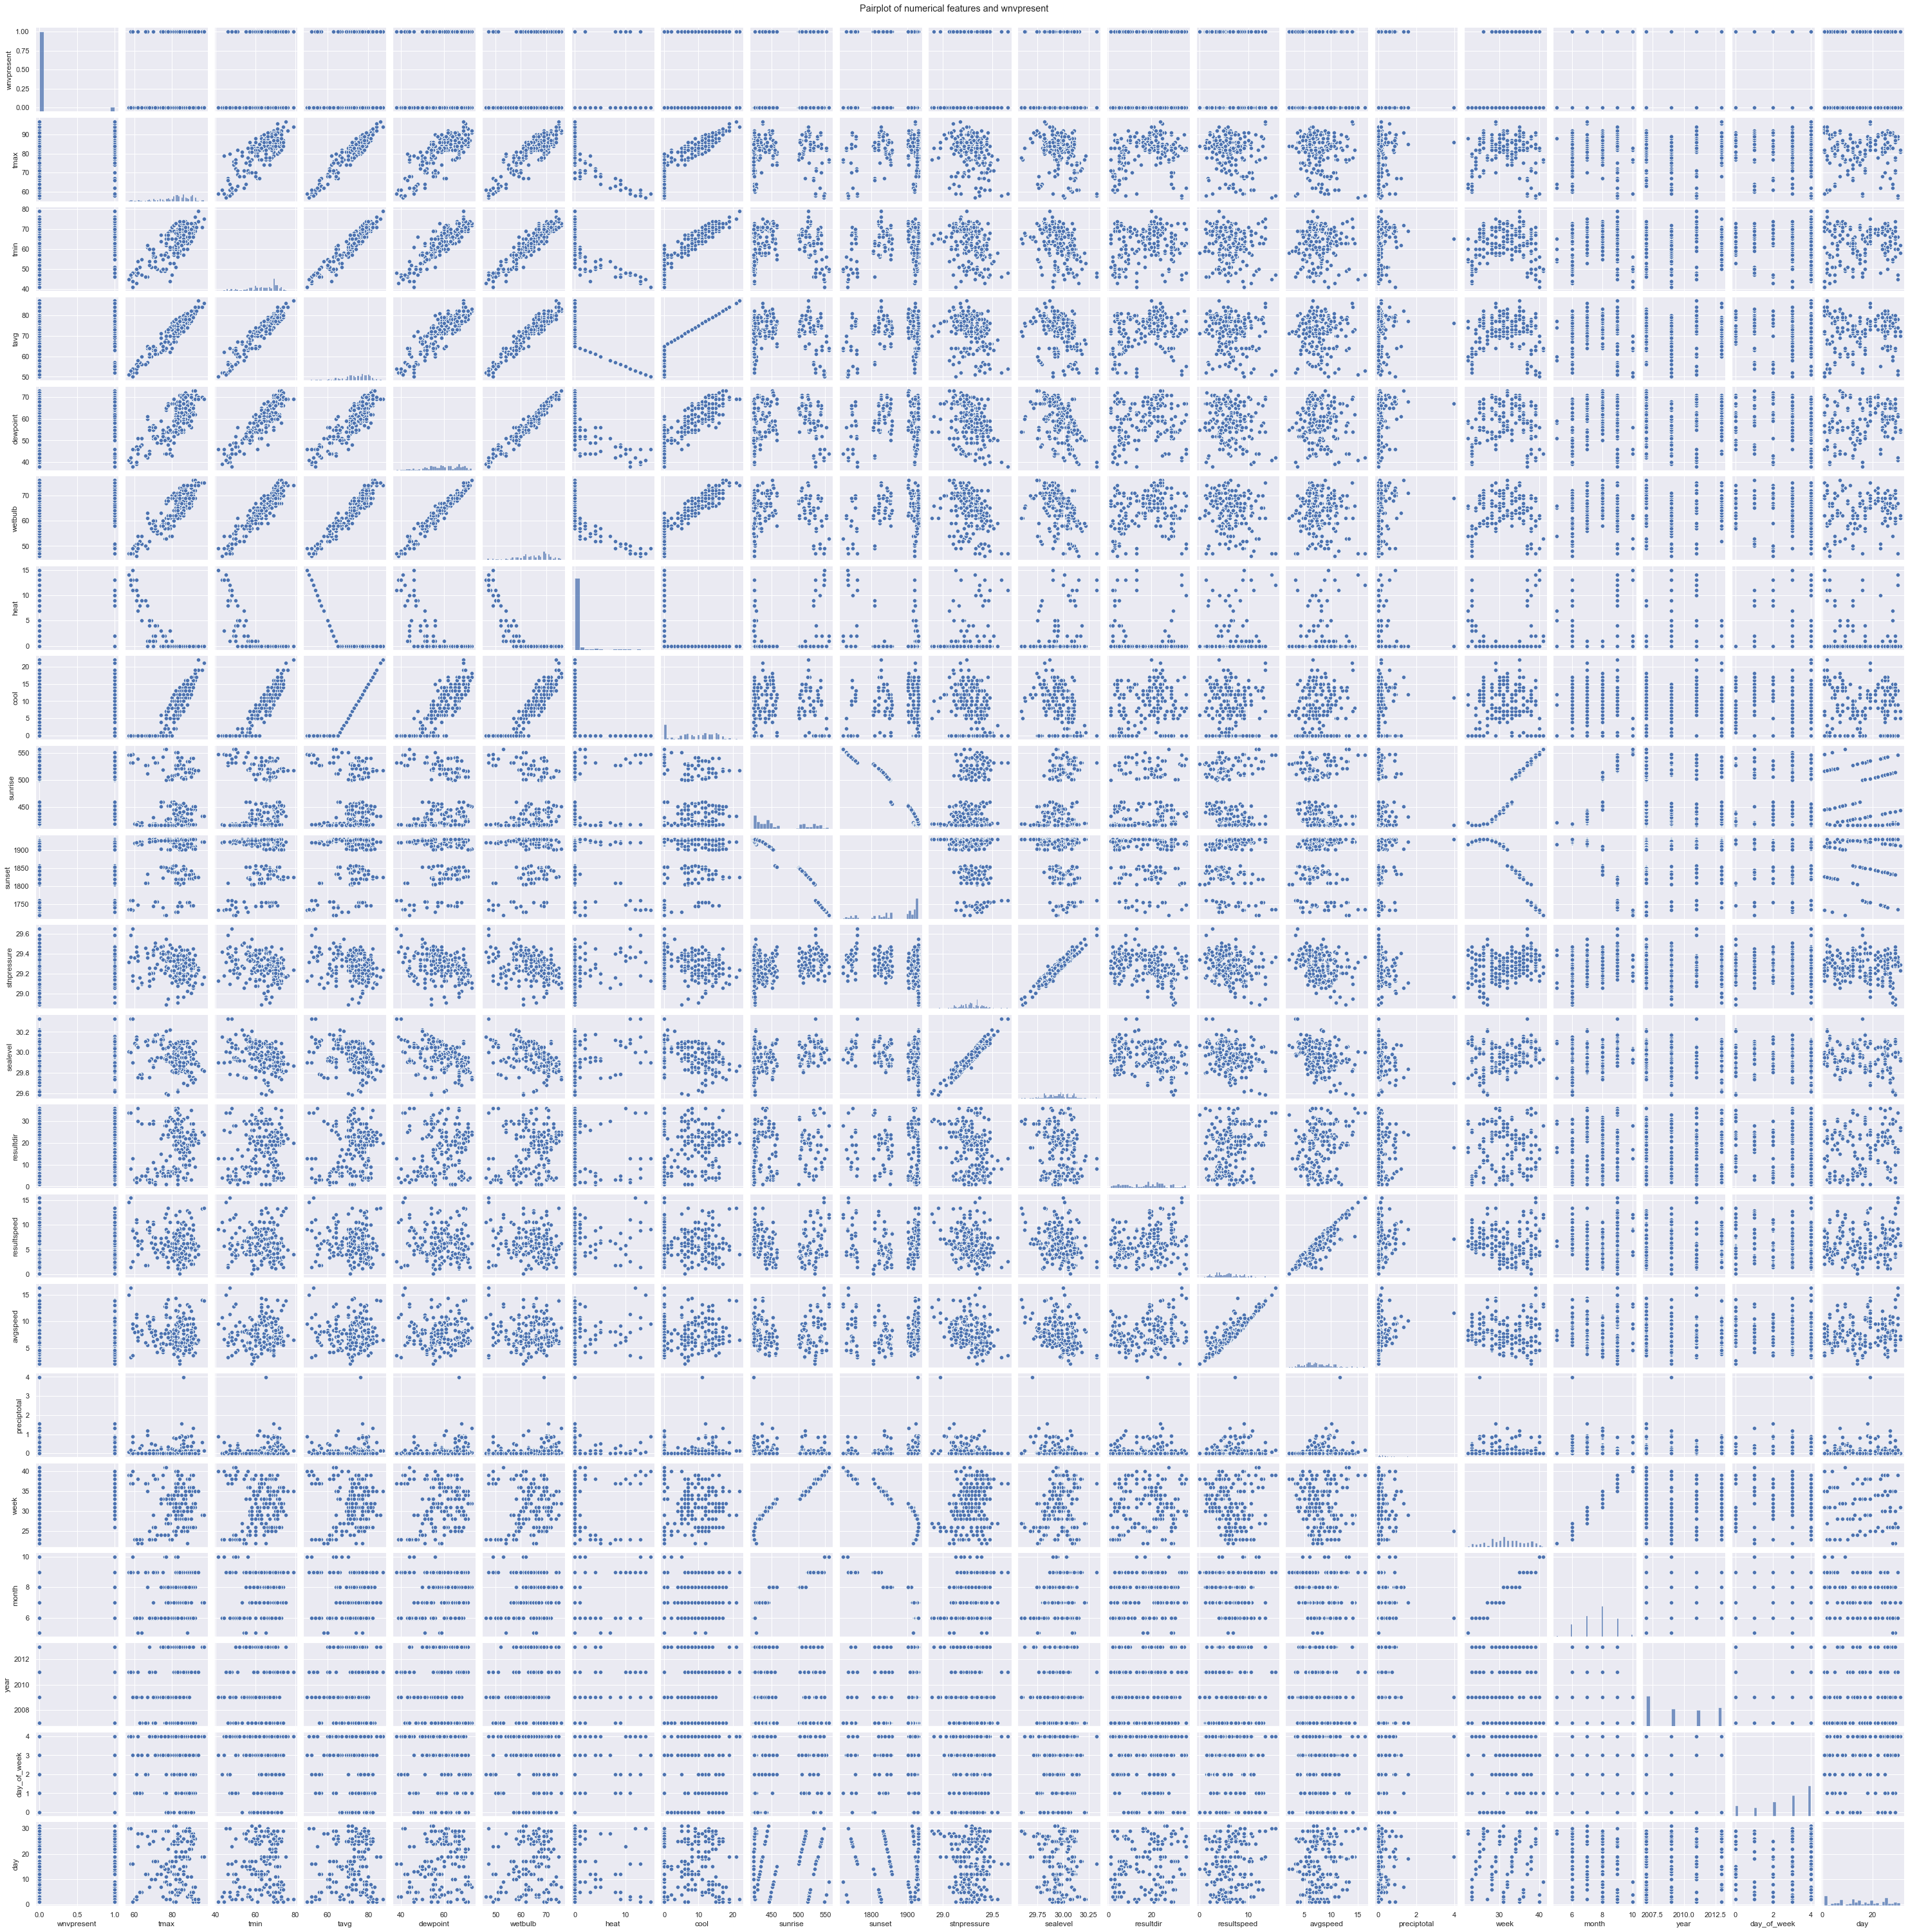

In [4]:
#plot pairplot 

sns.set()
columns = ['wnvpresent', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'stnpressure', 'sealevel', 'resultdir', 'resultspeed', 'avgspeed', 'preciptotal', 'week', 'month', 'year', 'day_of_week', 'day']
df_pairplot = sns.pairplot(df_train_weather[columns], diag_kind="hist", size=2)
df_pairplot.fig.suptitle("Pairplot of numerical features and wnvpresent", y=1.00);

In [133]:
#functions to gen plots to compare with wnvpresent

#define function to gen lineplots_1

def line_plot(x):
    df_plot = df_train_weather.groupby(['year', x])['wnvpresent'].sum().reset_index()
    
    plt.figure(figsize=(20,5))
    
    sns.lineplot(df_plot.loc[df_plot['year']==2007, x],df_plot['wnvpresent'], color='green', label='2007', marker='o')
    sns.lineplot(df_plot.loc[df_plot['year']==2009, x],df_plot['wnvpresent'], color='red', label='2009', marker='o')
    sns.lineplot(df_plot.loc[df_plot['year']==2011, x],df_plot['wnvpresent'], color='orange', label='2011', marker='o')
    sns.lineplot(df_plot.loc[df_plot['year']==2013, x],df_plot['wnvpresent'], color='blue', label='2013', marker='o')

    plt.title('WNV present against ' + x)
    plt.legend()
    
#define function to gen boxplots

def box_plot(y):
    plt.figure(figsize=(5,4))
    sns.boxplot(x='wnvpresent', y=y, data = df_train_weather)
    plt.title('Boxplot of ' + y + ' and wnvpresent');
    
#define function to gen countplots

def count_plot(z):
    plt.figure(figsize=(20,5))

    sns.countplot(df_train_weather.loc[df_train_weather['year']==2007, z], color='green', label='2007')
    sns.countplot(df_train_weather.loc[df_train_weather['year']==2009, z], color='red', label='2009')
    sns.countplot(df_train_weather.loc[df_train_weather['year']==2011, z], color='orange', label='2011')
    sns.countplot(df_train_weather.loc[df_train_weather['year']==2013, z], color='blue', label='2013')

    plt.title(z + ' across the years')
    plt.legend();

#define function to gen lmplots

def lm_plot(a, b):
    sns.lmplot(x=a, y=b, data=df_train_weather, fit_reg=False, hue='wnvpresent', height=6)
    plt.title(b + ' against ' + a);
    
#functions to gen plots to compare with nummosquitos with WNV

#define function to gen lineplots_2

def line_plot_2(c):
    df_plot = df_train_weather.groupby(['year', 'wnvpresent', c])['nummosquitos'].sum().reset_index()
    df_plot = df_plot[df_plot['wnvpresent'] == 1]

    plt.figure(figsize=(20,5))
    
    sns.lineplot(df_plot.loc[df_plot['year']==2007, c],df_plot['nummosquitos'], color='green', label='2007', marker='o')
    sns.lineplot(df_plot.loc[df_plot['year']==2009, c],df_plot['nummosquitos'], color='red', label='2009', marker='o')
    sns.lineplot(df_plot.loc[df_plot['year']==2011, c],df_plot['nummosquitos'], color='orange', label='2011', marker='o')
    sns.lineplot(df_plot.loc[df_plot['year']==2013, c],df_plot['nummosquitos'], color='blue', label='2013', marker='o')

    plt.title('nummosquitoes with WNV against ' + c)
    plt.ylabel('nummosquitoes with WNV')
    plt.legend();

# Presence of WNV in year 2007, 2009, 2011, 2013

Presence of WNV seems to be higher in 2007 and 2013. We expect to see more drastic changes in our plots of wnvpresent and weather features.

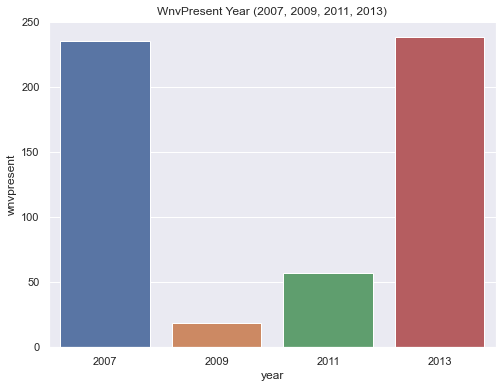

In [155]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_train.groupby(by='year').sum().reset_index(), x='year', y='wnvpresent')
plt.title('WnvPresent Year (2007, 2009, 2011, 2013)');

# Sunrise and Sunset

Presence of WNV does not show a clear trend with the timing for sunrise or sunset.

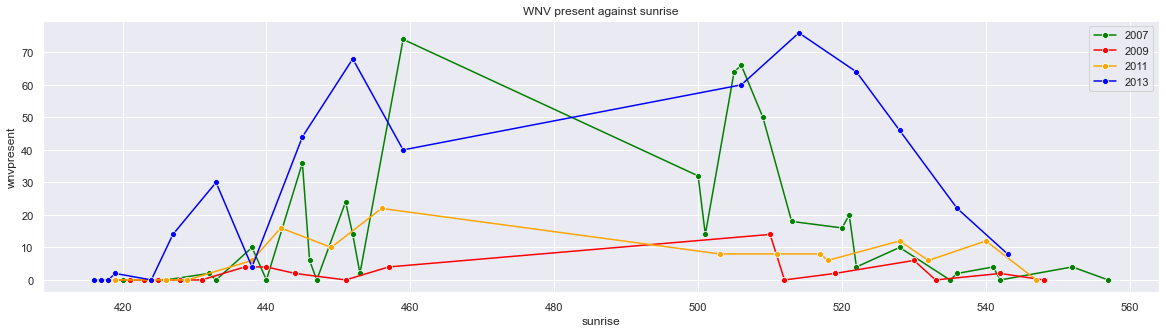

In [156]:
line_plot('sunrise')

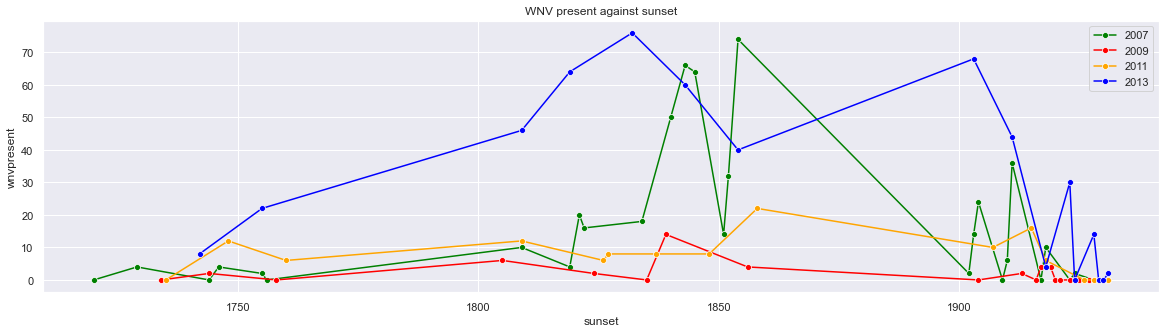

In [7]:
line_plot('sunset')

# Dewpoint and Wetbulb

Based on the boxplots, WNV is present in higher dewpoint and wetbulb temperatures.

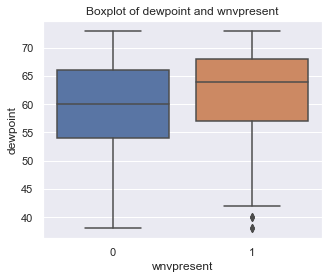

In [51]:
box_plot('dewpoint')

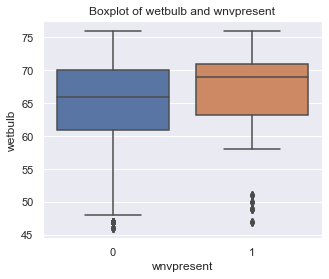

In [52]:
box_plot('wetbulb')

At higher temperature, presence of WNV is more prevalent and there are more mosquitoes with WNV. This can be seen from the lineplots below where the sum of wnvpresent and mosquitoes with WNV increases when dewpoint and wetbulb temperature is anywhere between 50 to 60 degrees fahrenheit. The sum of wnvpresent seems to have a more drastic increase in 2007 and 2013 probably due to higher tavg in these two years as seen from the countplot - large proportion of the tavg in 2007 and 2013 is above 70 degrees fahrenheit.

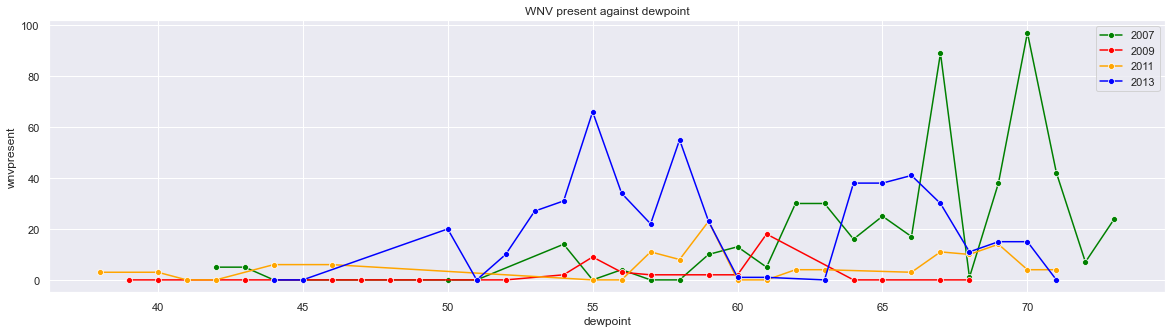

In [10]:
line_plot('dewpoint')

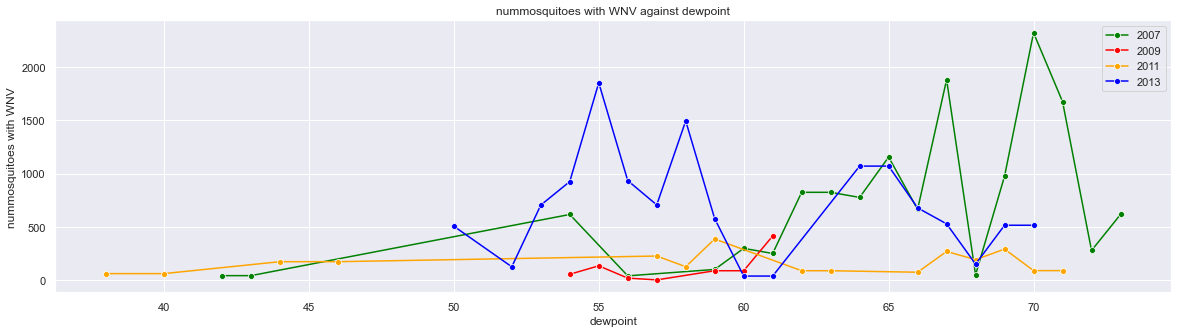

In [141]:
line_plot_2('dewpoint')

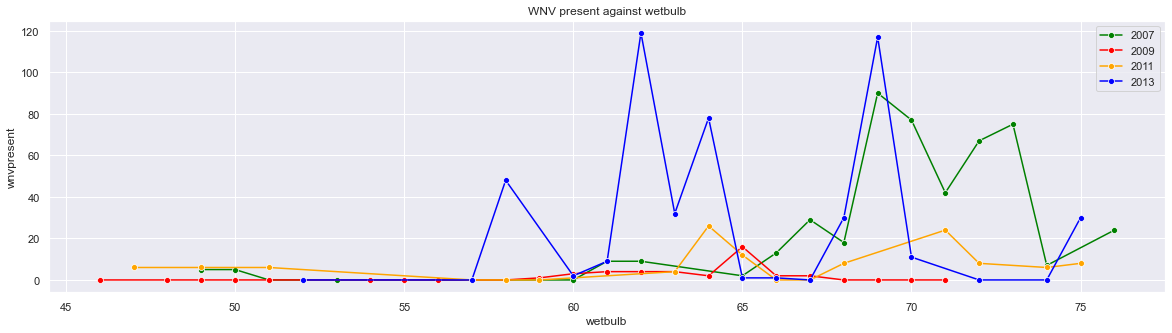

In [11]:
line_plot('wetbulb')

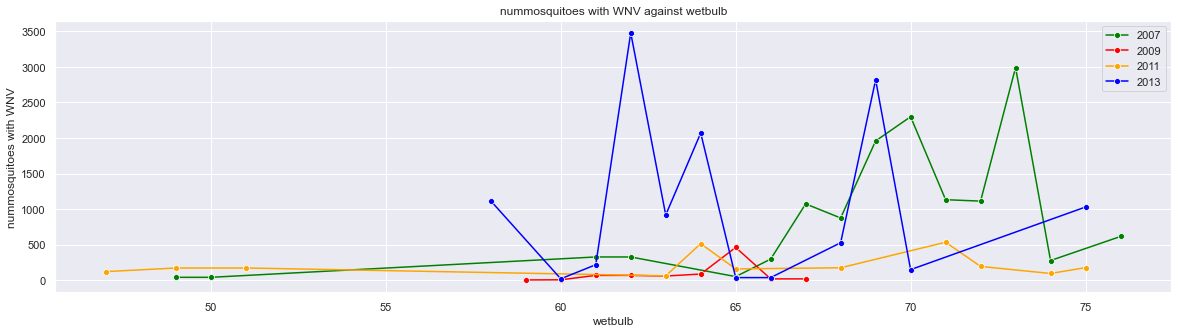

In [142]:
line_plot_2('wetbulb')

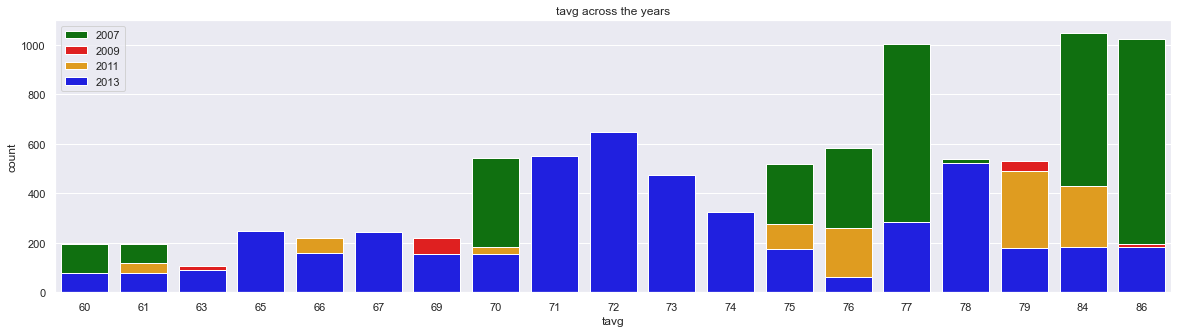

In [48]:
count_plot('tavg')

# tmin, tmax, tavg

Based on the scatter plot, higher tmax and tmin temperatures contributes to higher prevalence of WNV. <br>

WNV and number of mosquitoes with WNV was prevalent in 2007 and 2013 when average temperature is above 70 degrees fahrenheit seen from the lineplot below.

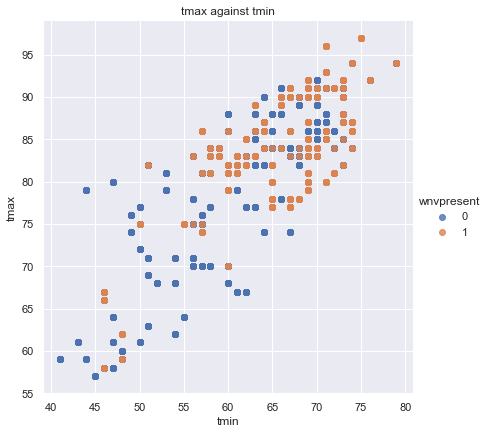

In [87]:
lm_plot('tmin', 'tmax')

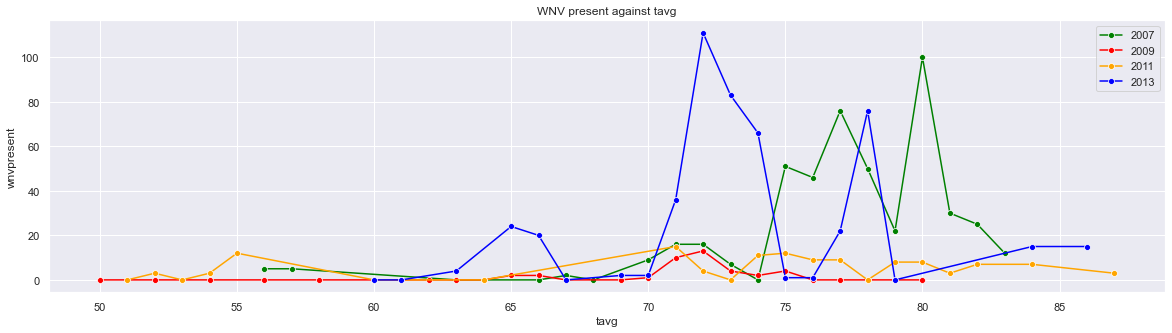

In [28]:
line_plot('tavg')

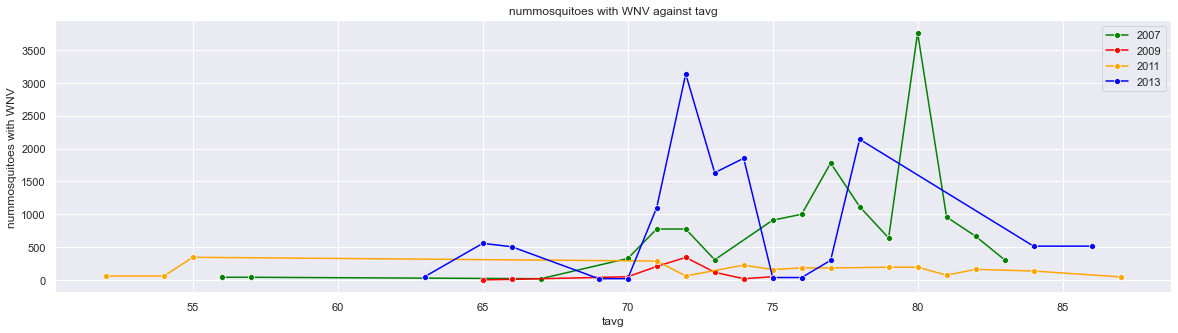

In [140]:
line_plot_2('tavg')

# Heat and Cool

Seems like the average temperature across the years was generally not higher than the base 65 degree fahrenheit (heat) as seen from the countplot. <br>

However, it was at times cooler than the base 65 degree fahrenheit. We can take a look at the boxplot for cool.

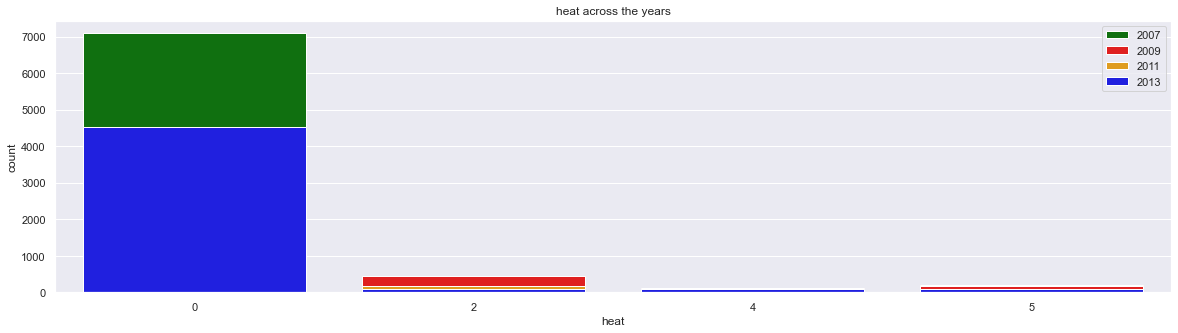

In [103]:
count_plot('heat')

The feature cool did not seem to play a part on the presence of WNV as seen from the similarities in boxplot for both wnvpresent = 0 and 1.

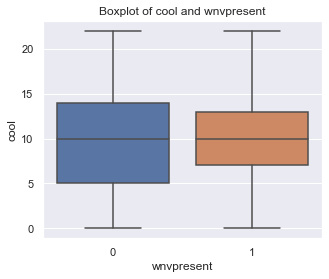

In [98]:
box_plot('cool')

# Sealevel and Stnpressure

Average sea level and station pressure did not seem to contribute to the presence of WNV as various spikes can be seen across different average sea level and station pressure.

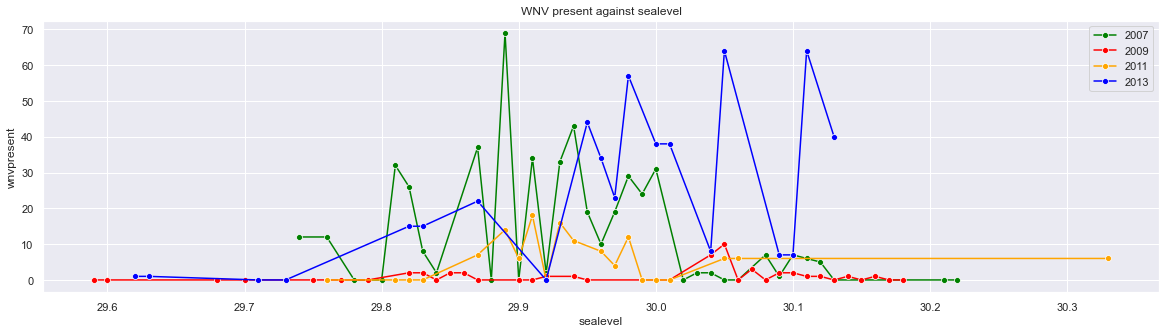

In [25]:
line_plot('sealevel')

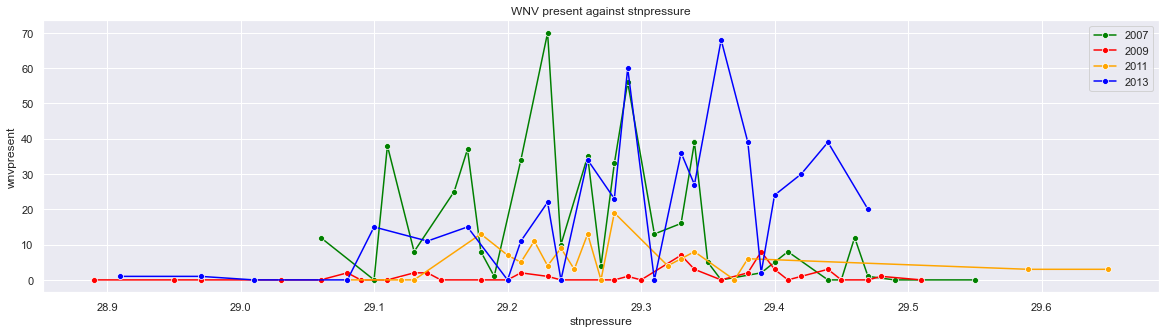

In [24]:
line_plot('stnpressure')

# avgspeed, resultspeed, resultdir

Resultant wind direction did not seem to play a part on the presence of WNV as seen from the boxplot.

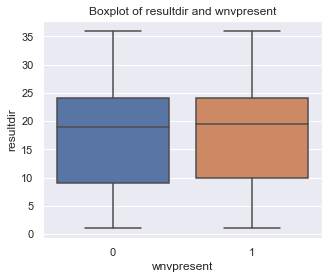

In [53]:
box_plot('resultdir')

Lower resultant and average wind speed (<12 mph) seems to contribute to higher presence of WNV as seen from the boxplot.

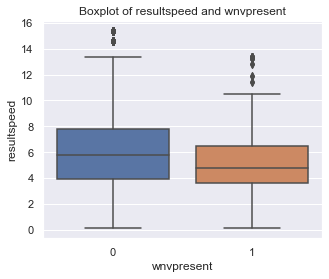

In [54]:
box_plot('resultspeed')

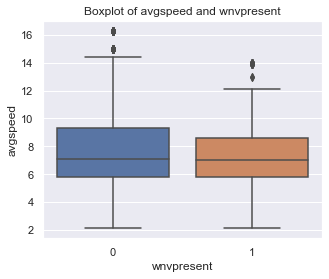

In [55]:
box_plot('avgspeed')

Based on the lineplots, WNV presence and number of mosquitoes with WNV is highest at avgspeed 4-12mph and resultspeed 2-10mph. At speeds higher than this range, WNV and mosquitoes with WNV does not seem to be so prevalent.

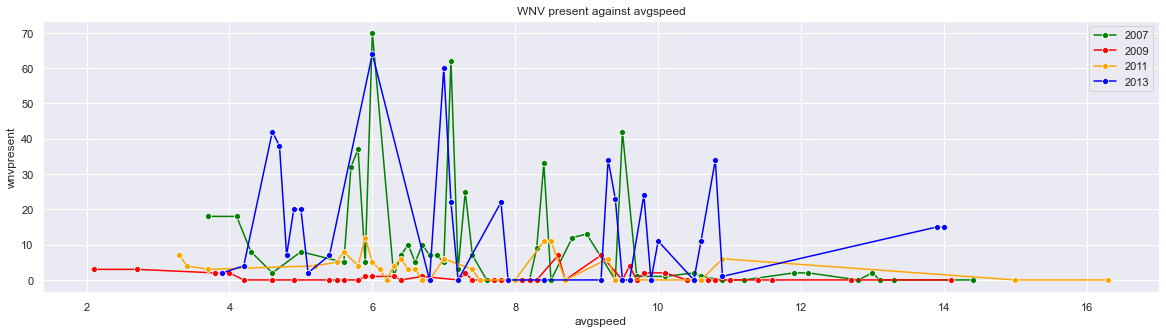

In [57]:
line_plot('avgspeed')

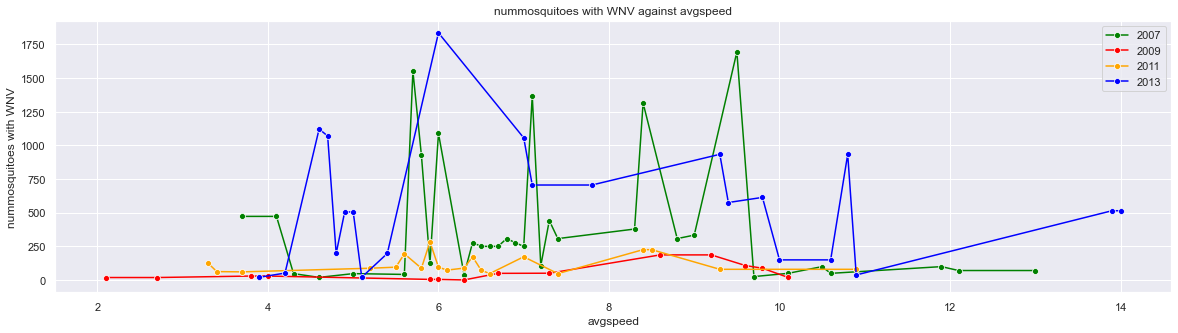

In [138]:
line_plot_2('avgspeed')

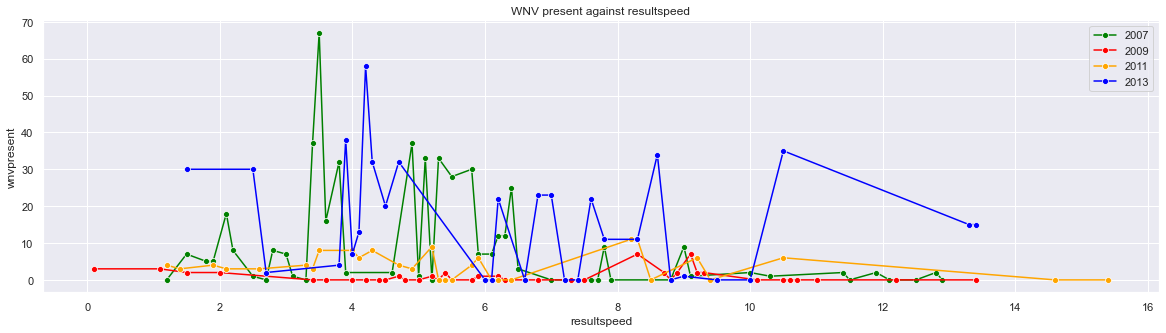

In [58]:
line_plot('resultspeed')

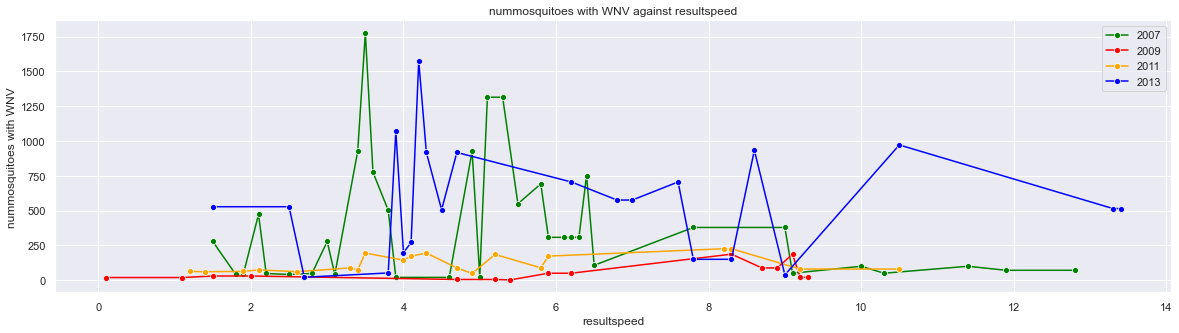

In [139]:
line_plot_2('resultspeed')

# preciptotal

It seems that lower total precipitation levels (<1.0 inch) would actually contribute to larger proportion of WNV and number of mosquitoes with WNV as seen from the lineplots below. <br>

However, at higher total precipitation levels (>1.0 inch), this is no longer true. At higher total precipitation levels, water levels due to rainfall and melted snow would be higher and that would mean that temperatures are lower, which probably explains why this is no longer true at higher total precipitation levels.

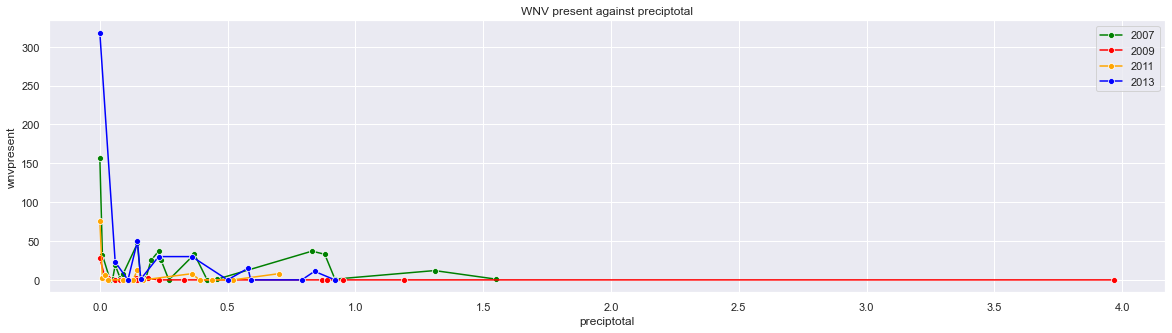

In [137]:
line_plot('preciptotal')

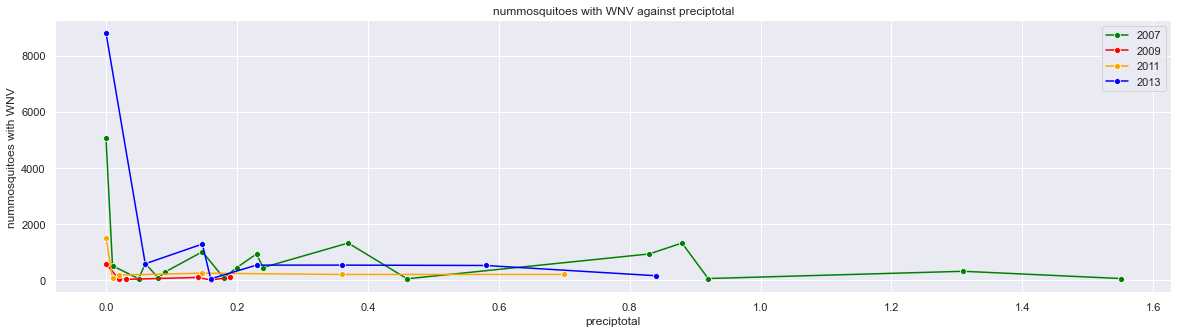

In [134]:
line_plot_2('preciptotal')

# General Observations of wnvpresent, number of mosquitoes with WNV and weather features

1. In general, the plots for 2007 and 2013 showed more sharp peaks and decline because WNV was more prevalent in these years as seen from the bar plot at the beginning of our analysis. <br>
2. Temperature seems to play an important factor in the WNV. Higher temperatures (>60 degrees fahrenheit) would contributes to higher prevalence of WNV and number of mosquitoes with WNV.
3. Lower average and resultant wind speed (<10 mph) contributes to higher prevalence of WNV and number of mosquitoes with WNV.
4. Lower total precipitation (<1.0 inch) contributes to higher prevalence of WNV and number of mosquitoes with WNV.

These observations are in line with the favourable weather conditions for mosquitoes who can carry the WNV to breed in the US ([*source*](https://www.mayoclinic.org/diseases-conditions/west-nile-virus/symptoms-causes/syc-20350320)). In the Summer, temperatures are hotter and mosquitoes would tend to breed better in such conditions. Mosquitoes also breed better in minimal standing water, which explains why low total precipitation is a contributing factor for WNV. 

One interesting insight would be that lower wind speeds seems to be a contributing factor for WNV. 

Studies have found that wind is an effective method against mosquitoes because 
(i) it prevents them from circling and landing on you
(ii) wind dilutes and disperses the carbon dioxide you exhale and carbon dioxide is one of the major chemicals which attract mosquitoes; and
(iii) wind cools you off from your sweat, lactic acid and body heat which attracts mosquitoes ([*source*](https://www.nytimes.com/2010/07/13/health/13real.html)). 